In [1]:
import euroleague as e
import matplotlib.pyplot as plt

# Get data

In [2]:
# fetch teams stats data using the euoleague module
seasons_rounds = {2018: 30, 2019: 16}
teams_stats = e.get_teams_stats(seasons_rounds)

# create a columns for highlighting Maccabi in plots
teams_stats['isMTA'] = teams_stats['team'].mask(cond=teams_stats['team'] != 'MTA')
mta_fnr_cond = ~teams_stats['team'].isin(['MTA', 'FNR'])
teams_stats['isMTAorFNR'] = teams_stats['team'].mask(cond=mta_fnr_cond)

# create a subset of team_stats with only 2019/20 season data
teams_stats_2019 = teams_stats.loc[teams_stats['season'] == 2019]

# Compare win% to net rating

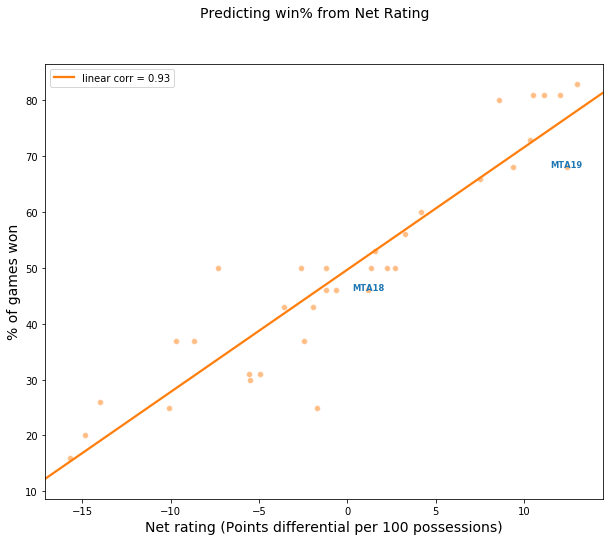

In [3]:
e.plot_bivariate(
    df=teams_stats, x='NETRtg', y='win_pct', hue='isMTA', fit_reg=True, text_size='small',
    suptitle='Predicting win% from Net Rating'
);

# Plot teams rating

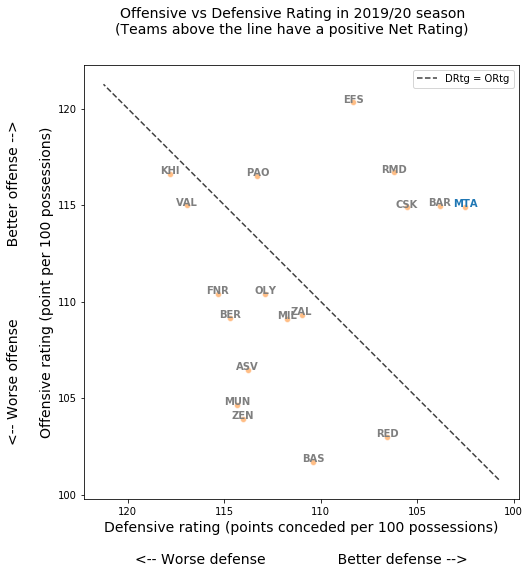

In [4]:
# plot offensive vs defensive rating in 2019/20 using euroleague.plot_bivariate
title_suffix = '\n(Teams above the line have a positive Net Rating)'
xlabel_suffix = '\n\n<-- Worse defense\t\t\t\tBetter defense -->'.replace('\t', '    ')
ylabel_prefix = '<-- Worse offense\t\t\t\tBetter offense -->\n\n'.replace('\t', '    ')

fig, ax = e.plot_bivariate(
    df=teams_stats_2019, x='DRtg', y='ORtg', hue='isMTA', xyline=True,
    show_season=False, dont_annotate_hue_na=False, 
    suptitle='Offensive vs Defensive Rating in 2019/20 season' + title_suffix
);
ax.set_xlabel(ax.get_xlabel() + xlabel_suffix); 
ax.set_ylabel(ylabel_prefix + ax.get_ylabel());
ax.invert_xaxis()

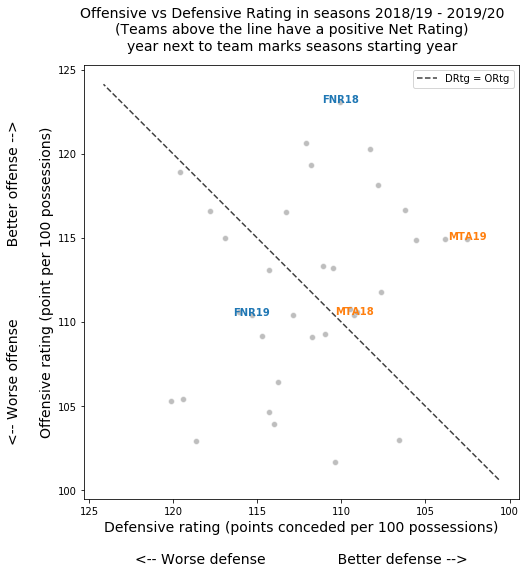

In [5]:
# plot offensive vs defensive rating in 2018/19-2019/20
title_suffix2 = '\nyear next to team marks seasons starting year'
fig, ax = e.plot_bivariate(
    df=teams_stats, x='DRtg', y='ORtg', hue='isMTAorFNR', xyline=True,
    suptitle='Offensive vs Defensive Rating in seasons 2018/19 - 2019/20' + title_suffix + title_suffix2
);
ax.set_xlabel(ax.get_xlabel() + xlabel_suffix); 
ax.set_ylabel(ylabel_prefix + ax.get_ylabel());
ax.invert_xaxis()

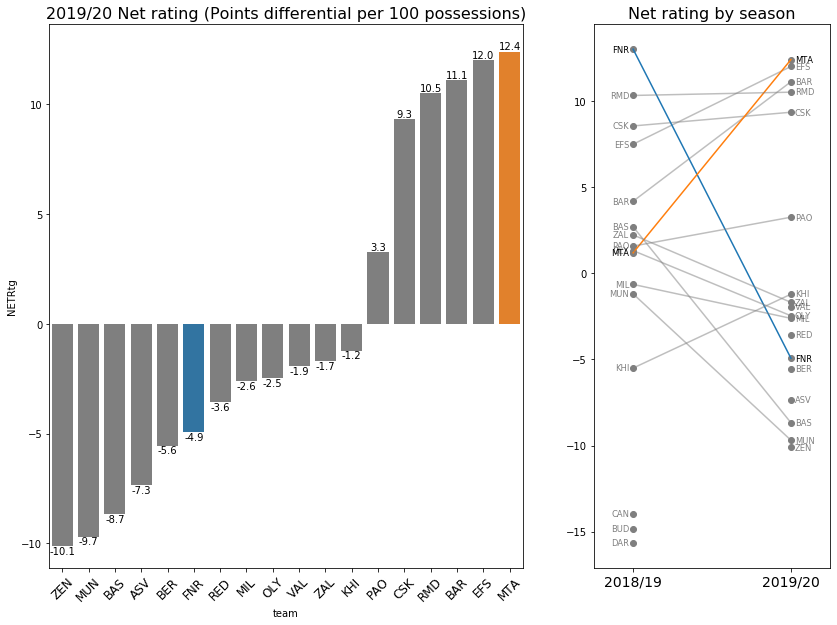

In [6]:
# plot net rating for teams in 2019/20 using euroleague.sorted_barplot
# and compare to previous year's net rating using euroleague.plot_parallel_pairs 
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(14, 10), gridspec_kw={'width_ratios': [2, 1]})

e.sorted_barplot(df=teams_stats_2019, metric='NETRtg', marked_teams=['MTA', 'FNR'],
                 ax=ax0, show_season=False);
ax0.set_title('2019/20 ' + ax0.get_title(), fontsize=16);

e.plot_parallel_pairs(df=teams_stats, metric='NETRtg', marked_iv_values=['MTA', 'FNR'], ax=ax1)
ax1.set_title('Net rating by season', fontsize=16);

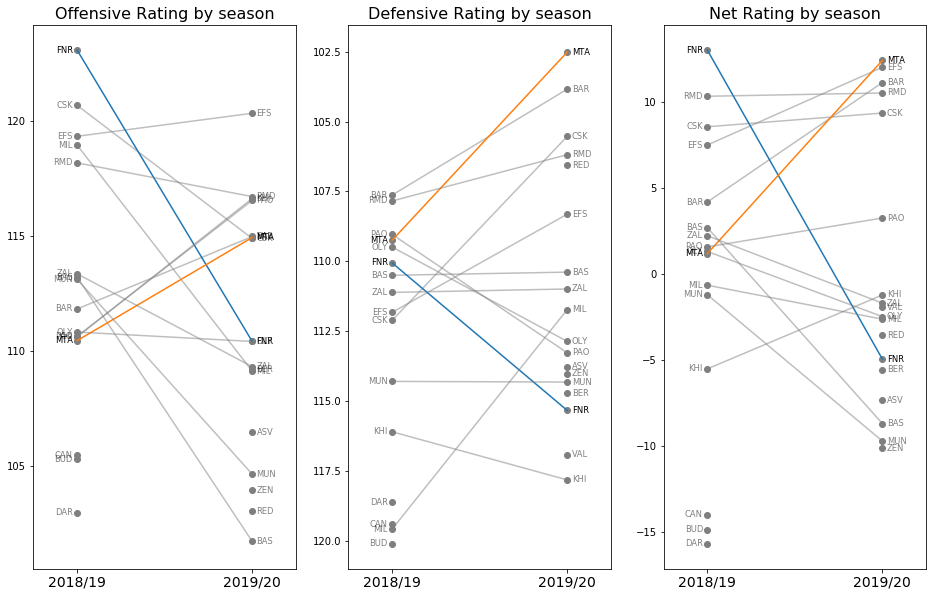

In [18]:
metrics = {'ORtg': 'Offensive Rating', 'DRtg': 'Defensive Rating', 'NETRtg': 'Net Rating'}
fig, axes = plt.subplots(nrows=1, ncols=len(metrics), figsize=(16, 10));

for i, (varname, title) in enumerate(metrics.items()):
    e.plot_parallel_pairs(
        df=teams_stats, metric=varname, marked_iv_values=['MTA', 'FNR'],
        annotate_only_marked=False, ax=axes[i]
    )
    axes[i].set_title(title + ' by season', fontsize=16);

axes[1].invert_yaxis()

# Pace effects

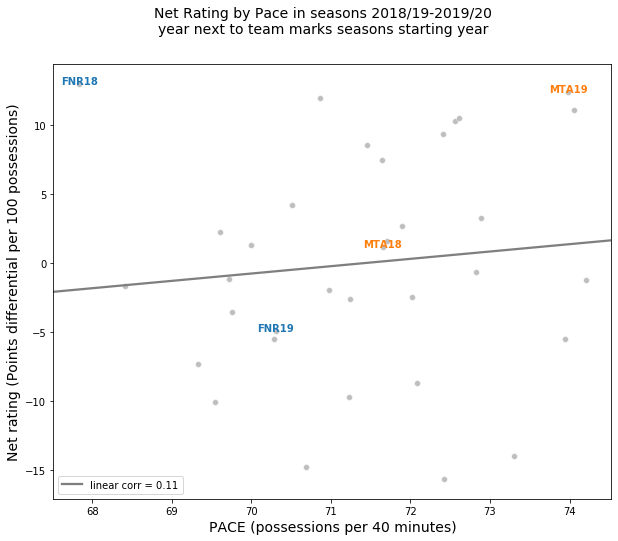

In [8]:
fig, ax = e.plot_bivariate(
    df=teams_stats, x='PACE', y='NETRtg', hue='isMTAorFNR',
    fit_reg=True, annotate_only_hue_true=True,
    suptitle='Net Rating by Pace in seasons 2018/19-2019/20' + title_suffix2
);
ax.legend(loc='lower left');

# points vs offensive rating

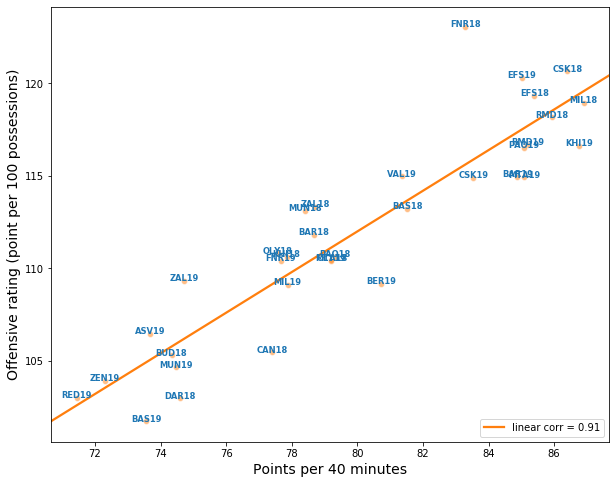

In [17]:
fig, ax = e.plot_bivariate(df=teams_stats, x='PTS40', y='ORtg', fit_reg=True, text_size='small');
ax.legend(loc='lower right');